# Trabalho 1 - Métodos Numérico para Termofluidos

---

UNIVERSIDADE DE BRASÍLIA

FACULDADE DE TECNOLOGIA

DEPARTAMENTO DE ENGENHARIA MECÂNICA

MÉTODOS NUMÉRICOS EM TERMOFLUIDOS

---

Aluno: Felipe Andrade - 17/0162010

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from math import factorial, radians

### Exercício 1
O objetivo do exercício é essencialmente calcular uma multiplicação simples de duas matrizes. Para o teste do código podemos passar como valores duas matrizes A, B quaisquer e comparar com o resultado de uma funcão conhecida com as mesmas propriedades, `np.dot()`.

Como é possível observar quando passamos duas matrizes:
```
A = [[1, 2, 3],
     [4, 5, 6]]
B = [[7, 8],
     [9, 10],
     [11, 12]]
```
obtemos com as funcões, respectivamente:
```
[[ 58.  64.]
 [139. 154.]]
 [[ 58  64]
 [139 154]]
```
Pode-se observar que o resultado  é numericamente o mesmo com a diferenca que a matriz da funcão tem seu tipo `float` e a matriz da funcão do numpy tem tipo `int`, como não temos casas decimais de qualquer forma, e a conversão ocorre com `int(x[i][j])` podemos dizer que os resultados são equivalentes.

Outro resultado importante se e observar é o que aconteceria se colocassemos matrizes que não podem ser multiplicadas.
```
A = [[1, 2, 3],
     [4, 5, 6]]
B = [[7, 8],
     [9, 10],
     [11, 12],
     [13, 14]]
```
Como é de se esperar, nossa funcão levanta um erro:
```
ValueError: formatos incompatíveis para multiplicação (2, 3) e (4, 2)
```
bem como a numpy,
```
ValueError: shapes (2,3) and (4,2) not aligned: 3 (dim 1) != 4 (dim 0)
```

In [19]:
def matrix_mult(A, B):
     '''
     Multiplica, isto é computa o produto interno entre duas matrizes A e B.
     Retorna o produto interno de A e B
     '''
     #vamos declarar variáveis para ficar 
     rows_A, columns_A = len(A), len(A[0])
     rows_B, columns_B = len(B), len(B[0])
     rows_C, columns_C = rows_A, columns_B

     C = np.zeros((rows_C, columns_C))

     if columns_A != rows_B:
          raise ValueError(f'formatos incompatíveis para multiplicação ({rows_A}, {columns_A}) e ({rows_B}, {columns_B})')

     # iterando pelas linhas de A
     for i in range(rows_A):
          # iterando pelas colunas de B
          for j in range(columns_B):
               # iterando pelas linhas de B
               for k in range(rows_B):
                    C[i][j] += A[i][k] * B[k][j]
                    
     return C
        
A = [[1, 2, 3],
     [4, 5, 6]]
B = [[7, 8],
     [9, 10],
     [11, 12]]
print(matrix_mult(A, B))
print(np.dot(A, B))


[[ 58.  64.]
 [139. 154.]]
[[ 58  64]
 [139 154]]


### Exercício 2 e 3
A média aritmética pode ser calculada por:
$$
\bar{x} = \frac{\sum^{n}_{i = 1} x_i}{n}
$$
E o desvio padrão da média:
$$
\sigma = \sqrt{\frac{\sum^{n}_{i=1} (x_i - \bar{x})^2}{n}}
$$

No execício 3, é pedido para calcular a média e desvio padrão dos elementos de uma matriz, podemos utilizar o exercío 3 para verificar o exercício 2. Nele para uma matriz 50x50:
```
[[ 1. -1.  1. ...  0. -1.  0.]
 [-2.  1. -2. ... -2.  1. -2.]
 [ 0. -2.  1. ...  0. -2.  0.]
 ...
 [ 1. -2. -1. ... -1. -2. -2.]
 [ 0. -2. -2. ... -2. -2.  0.]
 [ 1. -2. -1. ...  1. -1.  1.]]
```
Teremos o seguinte resultado
```
Média aritmética: -0.0008
Desvio Padrão da Média: 1.4252015155759554
```
Como os elementos $n$ com $n \in [-2, 2]$ são gerados randomicamente, obviamente, podemos esperar que a média será próxima de zero, o que de fato foi evidenciado.


In [20]:
def avg(arr):   
    return np.sum(arr) / len(arr)

def std_dev(arr):
    y = []
    n = len(arr)
    
    average = avg(arr)
    
    for i in range(n):
        y.append((arr[i] - average) ** 2)
        
    return np.sqrt(np.sum(y) / n)

def avg_std_dev(A):
    arr = []
    
    for i in range(len(A)):
        for j in range(len(A[0])):
            arr.append(A[i][j])
    
    average = avg(arr)
    standard_dev = std_dev(arr)

    return [average, standard_dev]

In [21]:
def rand_matrix(n):
    '''
    input:
        n: número de dimensões da matrix quadrada
    output:
        média: média aritimética dos elementos da matriz
        desvio padrão: desvio padrão das médias dos elementos
    '''
    M = np.zeros([n,n])

    for i in range(len(M)):
        for j in range(len(M[0])):
            a = np.random.randint(-2, 3)
            M[i][j] = a
    
    print(M)
    result = avg_std_dev(M)
    
    print(f'Média aritmética: {result[0]}')
    print(f'Desvio Padrão da Média: {result[1]}')
    
    return result

def main():
    rand_matrix(int(50))

if __name__ == '__main__':
    main()

[[-1. -1.  1. ...  1.  2.  1.]
 [-2. -2. -2. ... -2. -2. -2.]
 [ 2.  2. -1. ... -1. -1.  2.]
 ...
 [ 0.  2.  1. ... -2.  0.  0.]
 [-2.  1. -1. ...  0.  1. -1.]
 [-2.  2. -2. ...  1.  2. -1.]]
Média aritmética: 0.016
Desvio Padrão da Média: 1.4211769770158817


### Exercício 4

Pede-se que se desenvolva um programa, que a partir das informacões fornecidas por um usuário, crie-se um arquivo para armazenar as informacões e que posteriormente leia as informacões pedidas.

Para o input do usuário:
```
Por favor, digite seu nome:
John Doe
Por favor, digite sua idade:
21
```
cria-se se não exister e escreve-se no documento com caminho `'./user.txt'` ambas as informacões entrada. E a funcão que lê tais informacões as printa da seguinte forma
```
name: John Doe
age: 21
```
Bonus para este método no fim do dcumento.

In [38]:
def get_user_input():
    name = input('Por favor, digite seu nome:\n')
    age = input('Por favor, digite sua idade:\n')
    return name, age

def write_file(file_path):
    new_file = open(file_path, 'w')
    
    name, age = get_user_input()
    new_file.write(f'name: {name}\n')
    new_file.write(f'age: {age}\n')
    
    new_file.close()
    
def read_file(filepath):
    new_file = open(filepath, 'r')
    lines = new_file.readlines()
    for line in lines:
        print(line[:-1])
    new_file.close()

def main():
    write_file('user.txt')
    read_file('user.txt')

if __name__ == '__main__':
    main()

name: John Doe
age: 22


### Exercício 5
Pede-se um jogo de pedra papel e tesoura de um jogar só (contra o computador) com dois modos, um justo e outro injusto.

O programa funciona como esperado, embora não seja possível anexar todos os testes de jogos devido à extensão do terminal. O código para este exercício está no Anexo 1.

Obtemos um jogo que se comporta como o exemplo abaixo:
```
START FAIR GAME
----------------
Round 0. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
0
rock
----------------
tie
----------------
User wins: 0
Computer wins: 0
----------------
Round 1. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
paper
----------------
tie
----------------
User wins: 0
Computer wins: 0
----------------
Round 2. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
2
rock
----------------
lost
----------------
User wins: 0
Computer wins: 1
----------------
Round 3. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
rock
----------------
win
----------------
User wins: 1
Computer wins: 1
----------------
Round 4. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
0
rock
----------------
tie
----------------
User wins: 1
Computer wins: 1
----------------
Round 5. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
rock
----------------
win
----------------
User wins: 2
Computer wins: 1
----------------
Round 6. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
2
rock
----------------
lost
----------------
User wins: 2
Computer wins: 2
----------------
Round 7. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
0
rock
----------------
tie
----------------
User wins: 2
Computer wins: 2
----------------
Round 8. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
0
rock
----------------
tie
----------------
User wins: 2
Computer wins: 2
----------------
Round 9. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
scissors
----------------
lost
----------------
User wins: 2
Computer wins: 3
----------------
----------------
User wins: 2
Computer wins: 3
----------------
YOU LOST!
----------------
START UNFAIR GAME
----------------
Round 0. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
0
scissors
----------------
win
----------------
User wins: 1
Computer wins: 0
----------------
Round 1. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
rock
----------------
win
----------------
User wins: 2
Computer wins: 0
----------------
Round 2. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
scissors
----------------
lost
----------------
User wins: 2
Computer wins: 1
----------------
Round 3. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
2
rock
----------------
lost
----------------
User wins: 2
Computer wins: 2
----------------
Round 4. Enter "q" to exit the game.
----------------
Rock[0], Paper[1], Scissors[2] 
1
scissors
----------------
lost
----------------
User wins: 2
Computer wins: 3
----------------
----------------
User wins: 2
Computer wins: 3
----------------
YOU LOST!
```

### Exercício 6

Pede-se um gráfico com as cotacões do dólar para os últimos 20 dias. 

Para isso utiliza-se a biblioteca datetime e funcões para se obter as datas dos últimos 20 dias mesmo estando nos primeiros dias do mês ou nos primeiros dias do ano.
As datas dos últimos 20 dias são então utilizadas para chamar um API (*application programming interface*) fornecido pela "http://api.exchangeratesapi.io", que por sua vez retorna o pedido com um arquivo `.json` com o valor da cotacão do dia baseada no euro. O arquivo `.json` pode ser facilmente convertido em objeto do python. /Por fim a cotacão do dólar para euro em dólar para real a partir da cotacão do real para euro, temos os dados que serão utilizados no gráfico.

Nota: a `access_key` para este API tem limite de requests, sugere-se portanto que se crie outra `access_key` para testar o código caso este não esteja funcionando por esta razão.

{'success': True, 'timestamp': 1644191999, 'historical': True, 'base': 'EUR', 'date': '2022-02-06', 'rates': {'USD': 1.145429, 'BRL': 6.103414}}
5.328496135509053
{'success': True, 'timestamp': 1644105599, 'historical': True, 'base': 'EUR', 'date': '2022-02-05', 'rates': {'USD': 1.144945, 'BRL': 6.100846}}
5.328505736083392
{'success': True, 'timestamp': 1644019199, 'historical': True, 'base': 'EUR', 'date': '2022-02-04', 'rates': {'USD': 1.144945, 'BRL': 6.100846}}
5.328505736083392
{'success': True, 'timestamp': 1643932799, 'historical': True, 'base': 'EUR', 'date': '2022-02-03', 'rates': {'USD': 1.143569, 'BRL': 6.043076}}
5.284399979362854
{'success': True, 'timestamp': 1643846399, 'historical': True, 'base': 'EUR', 'date': '2022-02-02', 'rates': {'USD': 1.129873, 'BRL': 5.945844}}
5.262400287465937
{'success': True, 'timestamp': 1643759999, 'historical': True, 'base': 'EUR', 'date': '2022-02-01', 'rates': {'USD': 1.12727, 'BRL': 5.936425}}
5.266196208539214
{'success': True, 'time

Text(0, 0.5, 'USD para BRL')

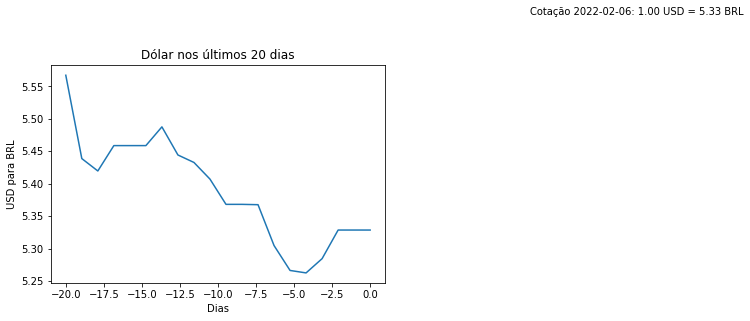

In [26]:
import requests
import datetime
from matplotlib import pyplot as plt

def decrement_day(day, month, year):
    '''
    Função para decrementar o dia ajustando os valores do mês e ano no processo.
    '''
    if day > 1:
        # se for um dia "normal", isto é, se não for o primeiro dia do mês
        # vamos decrementar uma vez
        day -= 1
        
    elif month > 1:
        # se o dia for o primeiro precisamos ajustar também o mês para irmos ao dia interior
        prev_month = month - 1
        
        if prev_month in [0, 1, 3, 5, 7, 8, 10, 12]:
            day = 31
        elif prev_month in [4, 6, 9, 11]:
            day = 30
        elif prev_month == 2: 
            # o único mês que não entra nos casos anteriores é o mês de fevereiro
            # como fevereiro pode ter 28 ou 29 dias, devemos também checar para anos bissextos
            if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:
                day = 29
                
            else:
                day = 28
        else:
            print(f'Mês inválido: month = {prev_month}')
        
        month -= 1
            
    elif month == 1:
        month = 12
        year -= 1
    
    return [day, month, year]
    

data = []
usd_to_brl = []
days = []

today = datetime.date.today()
today_date = today.strftime('%y-%m-%d')

date = [year, month, day] = today_date.split('-')

year = '20' + year

year = int(year)
month = int(month)
day = int(day)

day_str = str(day)

for i in range(20):
    if day < 10:
        day_str = '0' + str(day)
    if month < 10:
        month_str = '0' + str(month)
    access_key = "526e18180bb95890f0122456100bb84e"
    url = f'http://api.exchangeratesapi.io/v1/{str(year)}-{month_str}-{day_str}?access_key={access_key}&base=EUR&symbols=USD,BRL&format=1'
    response = requests.get(url) 
    dados = response.json()
    
    data.append(dados)
    
    print(dados)
    
    dado = data[i]
    usd = dados['rates']['USD']
    brl = dados['rates']['BRL']
    print(brl/usd)
    usd_to_brl.append(brl / usd)
    
    day, month, year = decrement_day(day, month, year)

    days.append(day)
    
    day_str = str(day)


x = days[::-1]
x = np.linspace(-20, 0, 20)
y = usd_to_brl[::-1]

dolar_today = usd_to_brl[0]

plt.figure()
plt.title("Dólar nos últimos 20 dias")
plt.plot(x, y)
plt.text(x= 10.5, y= 5.66, s=f'Cotação {today}: 1.00 USD = {dolar_today :.2f} BRL')
plt.xlabel("Dias")
plt.ylabel("USD para BRL")



### Exercício 7
Para as próximas questões, utilizam-se métodos numéricos para encontrar as raízes da funcão:
$$
f(x) = 2 \cdot \cosh{(x/4)} -x
$$

A raiz $x_2 \ast \approx 8.507$ não foi encontrada devidamente para o método do ponto fixo, uma vez que não consegui encontrar uma funcão $g(x_2 \ast) = x_2 \ast$ contudo pelo método ter encontrado a raiz $x_1 \ast \approx 2.358$, podemos dizer que o método funciona.

Resultados:
```
Iterações:17
Raiz de f(x): 2.358
Iterações:11
Raiz de f(x): 0.000
```

Iterações:17
Raiz de f(x): 2.357551
Iterações:11
Raiz de f(x): 0.000000


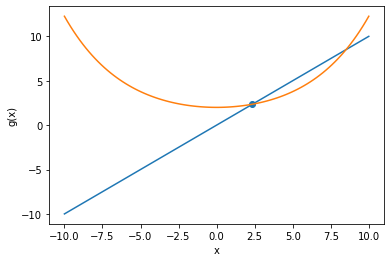

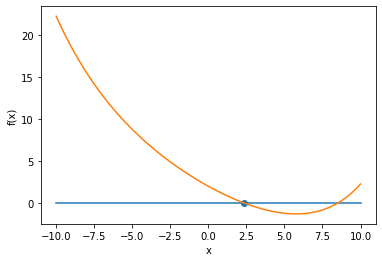

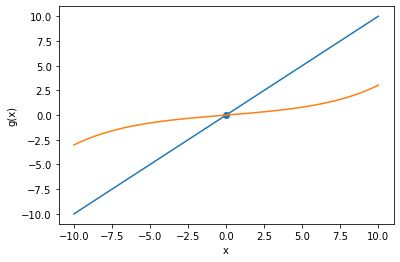

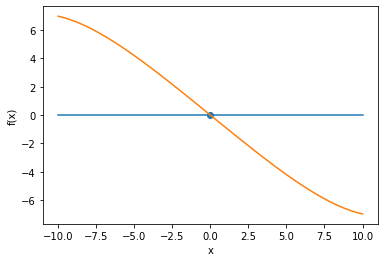

In [27]:
import numpy as np
from matplotlib import pyplot as plt

x = 1. #chute inicial
atol = 1.e-8

def g(x):
    return 2 * np.cosh(x/4) 

def g_lin(x):
    return 1/2 * np.sinh(x/4)

def fixed_point(x, atol, g):
    x_values = []
    k = 0
    dif = 2. * atol

    while dif >= atol:
        x_new = g(x)
        dif = np.abs(x_new - x)
        x = x_new
        k += 1
        # print(f'Iteração k = {k}, o valor de x é {x}')
        x_values.append(x)
        
    print(f'Iterações:{k}')
    print(f'Raiz de f(x): {x:.6f}')
    return x_values

def plot_fixed_point(interval: list, x, g):
    
    x_values = np.linspace(interval[0], interval[1], interval[2])
    
    funcao_g = g(x_values)
    funcao_f = g(x_values) - x_values
    zero = 0.0 * x_values

    plt.figure()
    plt.plot(x_values,x_values)
    plt.plot(x_values, funcao_g)
    plt.scatter(x= x, y= x)
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()
    plt.plot(x_values, zero)
    plt.plot(x_values, funcao_f)
    plt.scatter(x= x, y = 0.)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()
    
    
fix_pt_1 = fixed_point(x, atol, g)
fix_pt_2 = fixed_point(3., atol, g_lin)

plot_fixed_point([-10., 10., 100], fix_pt_1[-1], g)
plot_fixed_point([-10., 10., 100], fix_pt_2[-1], g_lin)


### Exercício 8

Utilizando o método da secante obtemos:
```
Raiz 1:
    Iter: 6,
    x = 2.358
Raiz 2:
    Iter: 7, 
    x = 8.507
```
Os quais são os valores esperados para as raízes de $f(x)$.

In [30]:
import numpy as np


def f(x):
    return 2. * np.cosh(x / 4) - x

def secant(x_0, x_1, atol, f):
    x_old = x_0
    x = x_1
    k = 1
    dif = 2. * atol
    x_values = [x]
     
    while dif >= atol:
        x_new = x - f(x) * (x - x_old) / (f(x) - f(x_old))
        dif = np.abs(x_new - x)
        x_old, x = x, x_new
        x_values.append(x)
        print(f'Iter: {k}, x = {x}')
        k += 1
        
    return x_values
        
secant_1 = secant(0, 1, 1e-8, f)
secant_2 = secant(10, 11, 1e-8, f)

print(secant_1)
print(secant_2)                                                                           

Iter: 1, x = 2.1340758773730126
Iter: 2, x = 2.3311991993233256
Iter: 3, x = 2.356943260809447
Iter: 4, x = 2.357549345601426
Iter: 5, x = 2.3575510537662208
Iter: 6, x = 2.357551053877402
Iter: 1, x = 9.072646692288606
Iter: 2, x = 8.740154294844235
Iter: 3, x = 8.53615789582969
Iter: 4, x = 8.508809211563822
Iter: 5, x = 8.507211123071752
Iter: 6, x = 8.507199575344037
Iter: 7, x = 8.50719957071304
[1, 2.1340758773730126, 2.3311991993233256, 2.356943260809447, 2.357549345601426, 2.3575510537662208, 2.357551053877402]
[11, 9.072646692288606, 8.740154294844235, 8.53615789582969, 8.508809211563822, 8.507211123071752, 8.507199575344037, 8.50719957071304]


### Exercício 9
Com o Método de Newton temos os seguintes resultados para $f(x)$:
```
Iter: 5, x_1 = 2.358
Iter: 5, x_2 = 8.507
```

In [31]:
def func(x):
    return 2. * np.cosh(x / 4) - x
def d_func(x):
    return .5 * np.sinh(x / 4) - 1.

def newton_method(x_0, atol, func, d_func):
    x_values = []
    x = x_0
    k = 0
    dif = 2. * atol
    
    while dif >= atol:
        x_new = x - func(x) / d_func(x)
        dif = np.abs(x_new - x)
        x = x_new
        k += 1
        
        print(f'Iter: {k}, x = {x}')
        x_values.append(x)
        
    return x_values
if __name__ == '__main__':
    newton_1 = newton_method(1., 1e-8, func, d_func)
    newton_2 = newton_method(8., 1e-8, func, d_func)

Iter: 1, x = 2.216474409179485
Iter: 2, x = 2.3555067250439574
Iter: 3, x = 2.357550606586456
Iter: 4, x = 2.3575510538773807
Iter: 5, x = 2.357551053877402
Iter: 1, x = 8.584695055013547
Iter: 2, x = 8.508657714758835
Iter: 3, x = 8.507200100111358
Iter: 4, x = 8.507199570713096
Iter: 5, x = 8.507199570713027


### Exercício 11
O método da bisseccão é pedido no exercício 11, mas é necesárioresolvê-lo para obter os dados para o exercício 9. Portanto este é um parênteses com o exercício 11.
Com o Método da Bisseccão obtemos:
``` 
------------ Result k = 21 ------------
x* = 2.3575518131256104
diff = 4.291534423828125e-06
------------ Result k = 21 ------------
x* = 8.507199764251709
diff = 2.86102294921875e-06
```
Que também são os valores esperados para as raízes de $f(x)$.


not ok
Iter: k = 0 ------------
valor de c_n = 0
valor de f(c_n) = 2.0
Iter: k = 1 ------------
valor de c_n = 5.5
valor de f(c_n) = -1.2920836812746765
Iter: k = 2 ------------
valor de c_n = 3.25
valor de f(c_n) = -0.5527179027057114
Iter: k = 3 ------------
valor de c_n = 2.125
valor de f(c_n) = 0.16392697497074726
Iter: k = 4 ------------
valor de c_n = 2.6875
valor de f(c_n) = -0.21884502392807104
Iter: k = 5 ------------
valor de c_n = 2.40625
valor de f(c_n) = -0.03332712605892274
Iter: k = 6 ------------
valor de c_n = 2.265625
valor de f(c_n) = 0.06386019868541704
Iter: k = 7 ------------
valor de c_n = 2.3359375
valor de f(c_n) = 0.01490333324421167
Iter: k = 8 ------------
valor de c_n = 2.37109375
valor de f(c_n) = -0.00930311834675468
Iter: k = 9 ------------
valor de c_n = 2.353515625
valor de f(c_n) = 0.0027773551591296908
Iter: k = 10 ------------
valor de c_n = 2.3623046875
valor de f(c_n) = -0.003268576281235447
Iter: k = 11 ------------
valor de c_n = 2.35791015625
v

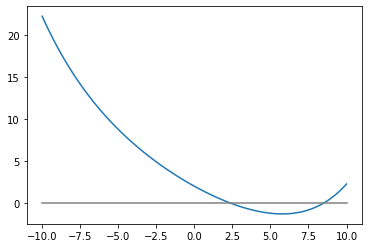

In [32]:
import numpy as np 
from matplotlib import pyplot as plt

def bissec_c(a, b, tol, f):
    result = []
    k_max = np.log((b - a) / (2 * tol))
    k = 0
    
    diff = np.abs(a - b)
    
    a_n = a
    b_n = b
    c_n = 0
    
    teste = f(a_n) * f(b_n) < 0
    if teste: print('ok') 
    else: print('not ok')
    
    while (k <= k_max + 1):
        print(f'Iter: k = {k} ------------')
        print(f'valor de c_n = {c_n}')
        print(f'valor de f(c_n) = {f(c_n)}')
        
        c_n = .5 * (b_n + a_n)
        
        if f(c_n) * f(a_n) < 0:
            b_n = c_n
            
        elif f(c_n) * f(a_n) > 0:
            a_n = c_n
        
        k += 1
        
        x = .5 * (b_n + a_n)
        result.append(x)
    diff = np.abs(a_n - b_n)

    print(f'------------ Result k = {k} ------------')
    print(f'x* = {x}')
    print(f'diff = {diff}')
    
    return result
    
def plot_bissec(a, b, f):
    x = np.linspace(a, b, 100)
    y = f(x)
    zeros = 0.* x
    
    plt.figure()
    plt.plot(x, y)
    plt.plot(x, zeros, color='grey')
    plt.show()
    

a, b, tol = 1., 10., 1.e-8

def f(x):
    return 2 * np.cosh(x / 4) - x

bissec_1 = bissec_c(a, b, tol, f)
bissec_2 = bissec_c(4., b, tol, f)

plot_bissec(-10., 10, f)


### Continuacão do Exercício 9

Agora vamos por fim, realizar o que se é pedido pelo exercício que é comparar os erros $e_k = |x \ast - x|$, que $x$ é o valor de x em cada iteracão para cada um dos métodos supra-citados e analisados.

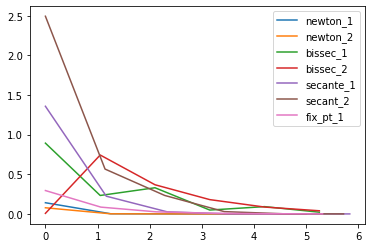

In [34]:
ek = lambda x, root : np.abs(root - x)

root_1 = 2.3575510538774
root_2 = 8.5071995707130 

def get_ek_values(x_values, root):
    result = []
    for x in x_values:
        result.append(ek(root, x))
    x_result = np.linspace(0, len(result), len(result))
    return result, x_result
'''Calculando os valores para o Método de Newton'''
ek_newton_1, x_newton_1 = get_ek_values(newton_1, root_1)
ek_newton_2, x_newton_2 = get_ek_values(newton_2, root_2)

'''Calculando os valores para o Método da Bissecção'''
ek_bissec_1, x_bissec_1= get_ek_values(bissec_1, root_1)
ek_bissec_2, x_bissec_2 = get_ek_values(bissec_2, root_2)

'''Calculando os valores para o Método da Secante'''
ek_secant_1, x_secant_1 = get_ek_values(secant_1, root_1)
ek_secant_2, x_secant_2 = get_ek_values(secant_2, root_2)

'''Calculando os valores para o Método do Ponto Fixo'''
ek_fix_pt_1, x_fix_pt_1 = get_ek_values(fix_pt_1, root_1)
ek_fix_pt_2, x_fix_pt_2 = get_ek_values(fix_pt_2, root_2)

# print('newton_1',len(ek_newton_1), ek_newton_1)
# print('newton_2', len(ek_newton_2), ek_newton_2)
# print(len(ek_bissec_1), ek_bissec_1)
# print(len(ek_bissec_2), ek_bissec_2)

comp = plt.figure

plt.plot(x_newton_1, ek_newton_1)
plt.plot(x_newton_2, ek_newton_2)
plt.plot(x_bissec_1[:6], ek_bissec_1[:6])
plt.plot(x_bissec_2[:6], ek_bissec_2[:6])
plt.plot(x_secant_1[:6], ek_secant_1[:6])
plt.plot(x_secant_2[:6], ek_secant_2[:6])
plt.plot(x_fix_pt_1[:6], ek_fix_pt_1[:6])


plt.legend(['newton_1', 'newton_2', 'bissec_1', 'bissec_2', 'secante_1', 'secant_2', 'fix_pt_1'])

A partir do gráfico obtido acima, podemos dizer que os métodos mais rápidos para as condicões dadas são:

1. newton_2
2. newton_1
3. ponto_fixo_1
4. secante_1
5. secante_2
6. bissec_2
7. bissec_1
   
em que o indice `n` de `método_n` representa para qual raiz estamos utilizando o método, isto é `newton_1` é o método de newton aplicado para a primeira raiz da funcão $g(x) = 2 \cdot \cosh{\frac{x}{4}} - x$ e por assim em diante.

#### Porque `fix_pt_2` não está no gráfico?

Não consegui encontrar uma funcão $g(x)$ que convergisse para a segunda raiz $x_2 \ast$.

### Exercício 10

Um método numérico para obter o valor de $\sqrt{2}$. 

Com o método babilônico:
$$
a_{n+1} = \frac{a_n + \frac{2}{a_n}}{2}
$$
obtemos,
```
iter: 0, x = 1
iter: 1, x = 1.5
iter: 2, x = 1.41666666
iter: 3, x = 1.41421568
iter: 4, x = 1.41421356
iter: 5, x = 1.41421356
iter: 6, x = 1.41421356
iter: 7, x = 1.41421356
```
comparando com numpy, vemos que:
```
np.sqrt(2) = 1.41421356
```
que é exatamente o valor obtido pelo método numérico até a 8ª casa decimal.

In [35]:
k_max = 7
k = 0
x = 1

while k <= k_max:
    print(f'iter: {k}, x = {x :.8f}')
    x_new = (x + (2 / x)) / 2
    x = x_new
    k += 1
    
print(f'{np.sqrt(2):.8f}')

iter: 0, x = 1.00000000
iter: 1, x = 1.50000000
iter: 2, x = 1.41666667
iter: 3, x = 1.41421569
iter: 4, x = 1.41421356
iter: 5, x = 1.41421356
iter: 6, x = 1.41421356
iter: 7, x = 1.41421356
1.41421356


### Exercício 12

Iter: 1, x = 4.185039863261519
Iter: 2, x = 2.4678936745146656
Iter: 3, x = 3.2661862775691066
Iter: 4, x = 3.1409439123176353
Iter: 5, x = 3.1415926536808043
Iter: 6, x = 3.141592653589793


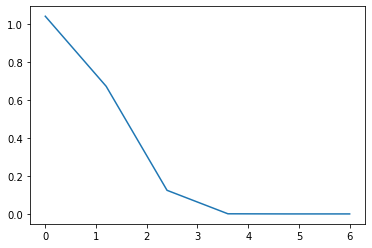

In [44]:
import newton

h = lambda x : np.sin(x)
h_prime = lambda x : np.cos(x)

a, b = 0, 2 * np.pi

result = newton.newton_method(2., 1e-8, h, h_prime)
y_val, x_val = get_ek_values(result, np.pi)

plt.plot(x_val, y_val)


### Exercício 13
Use um polinômio de Taylor em torno de 45º para aproximar cos 41º com uma precisão de 1e−6.

Podemos realizar esse problema utilizando Séries de Taylor e comparar o resultado em cada iteracão com `np.cos()` a fim de determinar o erro. Com isso obtém-se:
```
Iteracão: 4, o valor de x é 0.7547078847107386, e diff = 1.695512033439428e-06
Iteracão: 5, o valor de x é 0.7547095898869727, e diff = 9.664200661951838e-09
```
Que é o resultado que esperávamos.

In [64]:


def cos(x):
    n = 0
    tol = 1e-6
    diff = 2 * tol
    result = 0
    while diff >= tol:
        osc = ((-1) ** n)
        m = 2 * n
        exp = (x ** m)
        x_new = osc * (exp / factorial(m))
        result += x_new
        diff = np.abs(result - np.cos(x))
        n += 1
        print(f'Iteracão: {n}, o valor de x é {result}, e diff = {diff}')


cos(radians(41))

Iteracão: 1, o valor de x é 1.0, e diff = 0.24529041977722799
Iteracão: 2, o valor de x é 0.7439690586692714, e diff = 0.010740521553500582
Iteracão: 3, o valor de x é 0.7548943658223879, e diff = 0.0001847855996158776
Iteracão: 4, o valor de x é 0.7547078847107386, e diff = 1.695512033439428e-06
Iteracão: 5, o valor de x é 0.7547095898869727, e diff = 9.664200661951838e-09


### Anexo 1
Código referente ao jogo de pedra,papel e tesoura, isto é, ao exercício 5.

In [ ]:
import random
"""
JANEIRO DE 2022

FELIPE CARVALHO ANDRADE - 17/0162010

UNIVERSIDADE DE BRASÍLIA
FACULDADE DE TECNOLOGIA
DEPARTAMENTO DE ENGENHARIA MECÂNICA
MÉTODOS NUMÉRICOS EM TERMOFLUIDOS
"""

'''
Este é um jogo single-player (contra o computador) de pedra papel e tesoura, onde ganha quem fizer 3 pontos primeiro.

Para jogar digite uma das três opções (rock, paper, scissors), e espere a resposta do computador.

Existem dois modos: justo (computador pode ganhar) e injusto (computador sempre ganha)
'''

class Game:
    """
    Uma classe que funciona como um jogo de pedra, papel e tesoura
    ...
    Atributos
    ---------
    user_input: int
        o valor da jogada do usuário (pedra[0], papel[1], tesoura[2])
    computer: int
        o valor da jogada do computador (pedra[0], papel[1], tesoura[2])
    computer_play: string
        a jogada do computador
    computer_wins: int
        quantas partidas o computador venceu
    user_wins: int
        quantas partidas o usuário venceu
    round: int
        qual a partida atual
    continue_game: bool
        variável booleana que define para o loop while se o jogo deve continuar ou parar
        
    Methods
    -------
    getUserInput()
        pega a jogada do usuário, converte em números e salva em self.user_input
    comp_play(computer_input: int)
        converte as jogadas numéricas do computador em palavras de forma a facilitar a compreensão do usuário
    fair_computer()
        gera uma jogada aleatória para o computador
    unfair_computer
        gera uma jogada que necessariamente vai ganhar do usuário
    calculate_winner(user_input: int, computer_input: int)
        calcula o ganhador de uma partida
    register_match_results(result: str)
        registra o resultado da partida em self.user_wins ou self.computer_wins
    check_for_winners()
        checa o número de vitórias para encontrar um vencedor e mudar o valor de self.continue_game para parar o jogo
    game_result()
        printa o resultado do jogo
    reset_game()
        reseta o jogo (reinicia o valor das variáveis)
    fair_game()
        função que contém o jogo justo
    unfair_game()
        função que contém o jogo injusto
        
    Returns:
        None : essa classe não retorna nada
    """
    def __init__(self):
        # primeiro vamos iniciar a classe com valores impossíveis de serem inputados, para que se ocorrer um erro saibamos de onde ele vem
        self.user_input = 3;
        self.computer = 4;
        self.computer_play = ""
        self.computer_wins = 0
        self.user_wins = 0
        self.round = 0
        self.continue_game = True
        pass
    
    def getUserInput(self):
        # agora vamos pegar o input do usuário e vamos tratar esse input para obter valores numéricos
        print('Round %s. Enter "q" to exit the game.'% self.round)
        print('----------------')
        user_input = input('Rock[0], Paper[1], Scissors[2] \n').lower()
        
        if user_input == 'rock' or user_input == '0':
            self.user_input = 0
        elif user_input == 'paper' or user_input == '1':
            self.user_input = 1
        elif user_input == 'scissors' or user_input == '2':
            self.user_input = 2
        else:
            # novamente vamos colocar um valor impossível de ser inputado para controle de erro
            self.user_input = 10
            # retornando 0, 1 desta forma podemos saber se a função rodou de forma correta ou não
            print("Resposta não está em ['rock', 'paper', 'scissor', '0', '1', '2']")
            return 0
        return 1
    
    def convert_computer_play(self, computer_input):
        # aqui vamos converter os inputs numéricos do computador em uma jogada para o usuário
        if computer_input == 0 or computer_input == 3:
            self.computer_play = 'rock'
        elif computer_input == 1:
            self.computer_play = 'paper'
        elif computer_input == 2:
            self.computer_play = 'scissors'
        else:
            self.computer_play = 'play out of range'
    
    def fair_computer(self):
        # gerando um número aleatório em [0,1,2,3] "mas não existe só 3 inputs possíveis? Porque temos 4 indices?"
        # você entenderá quando fomos ver como o ganhador é calculado
        self.computer = random.randint(0,3)
        #convertendo o número em jogada
        self.convert_computer_play(self.computer)
        print(self.computer_play)
        
    def unfair_computer(self):
        # aqui só colocamos que a jogada que o computador fará será a jogada que ganha do usuário
        if self.user_wins == 2:
            self.computer = self.user_input + 1
        elif self.user_wins == 1:
            self.computer = random.randint(0,3)
            
        # convertendo o número em jogada
        self.convert_computer_play(self.computer)
        print(self.computer_play)
        
    
    def calculate_winner(self, user_input, computer_input):
        # Como calcular o vencedor:
        # temos as seguintes jogadas que formam um ciclo 
        #  ... -> pedra [0] -> papel[1] -> tesoura[2] -> pedra[3] ...
        # como estamos usando números ao invés de palavras, podemos dizer que o computador ganha se o seu input for
        # igual a o input do usuário + 1, desta forma:
        if user_input == computer_input or computer_input - 3 == user_input:
            # existem duas formas de ter um empate: se a jogada do usuário for a mesma que a do computador e se a 
            # jogada do computador for igual a do usuário somado de 3, pois assim teremos pedra e pedra
            return 'tie'
        elif computer_input == user_input + 1 or computer_input == user_input - 2:
            # olhando em um circulo é facil de notar que essas duas condições sao equivalentes, mas como pedra pode
            # assumir valores de [0] e [3], a segunda condicional se torna necessária
            return 'lost'
        elif computer_input == user_input - 1 or computer_input == user_input + 2:
            # o mesmo do que o ultimo caso mas ao contrário
            return 'win'
        else:
            return 'somethin went wrong'
    
    def register_match_results(self, result):
        # funcao para registrar o resultados das partidas
        if result == 'win':
            self.user_wins += 1
        elif result == 'lost':
            self.computer_wins += 1
        else:
            pass
    
    def check_for_winners(self):
        #chacando para ver se alguém ganhou a melhor de 5
        if self.user_wins == 3 or self.computer_wins == 3:
            self.continue_game = not self.continue_game
        else:
            self.round += 1
        
    def game_result(self, computer_wins, user_wins):
        print('----------------')
        print('User wins: %s' % user_wins)
        print('Computer wins: %s' % computer_wins)
        
        if computer_wins > user_wins:
            print('----------------')
            print('YOU LOST!')
            print('----------------')
        elif user_wins > computer_wins:
            print('----------------')
            print('YOU WON!')
            print('----------------')
        else:
            print('----------------')
            print('You tied, try again')
    
    def reset_game(self):
        self.round = 0
        self.computer_wins = 0
        self.user_wins = 0
        self.continue_game = True
        
    
    def fair_game(self):
        print('START FAIR GAME')
        print('----------------')
        while self.continue_game:
            # pegando a jogada do usuário
            self.getUserInput()
            # print("User: ", self.user_input)
            
            # vamos colocar essa condicional para acabar o jogo com qualquer input que seja diferente dos que nós já
            # definimos anteriormente (rock, paper, scissors)
            if self.user_input not in range(0,3):
                self.reset_game()
                return 0
            
            # pegando uma jogada JUSTA do computador
            self.fair_computer()
            # print("Computer: ", self.computer)
            
            #calculando o vencedor
            win = self.calculate_winner(self.user_input, self.computer)
            
            self.register_match_results(win)
            self.check_for_winners()
            
            # printando o resultado
            print('----------------')
            print(win)
            print('----------------')
            print('User wins: %s' % self.user_wins)
            print('Computer wins: %s' % self.computer_wins)
            print('----------------')
            
        self.game_result(self.computer_wins, self.user_wins)
        self.reset_game()
            
    def unfair_game(self):
        print('START UNFAIR GAME')
        print('----------------')
        
        while self.continue_game:
            # pegando a jogada do usuário
            self.getUserInput()
            
            if self.user_input not in range(0,3):
                self.reset_game()
                return 0
            
            #pegando uma jogada INJUSTA do computador
            self.unfair_computer()
            
            #calculando o vencedor
            win = self.calculate_winner(self.user_input, self.computer)
            
            self.register_match_results(win)
            self.check_for_winners()
            
            print('----------------')
            print(win)
            print('----------------')
            print('User wins: %s' % self.user_wins)
            print('Computer wins: %s' % self.computer_wins)
            print('----------------')
            
        self.game_result(self.computer_wins, self.user_wins)
        self.reset_game()
            
game = Game()

#vamos jogar primeiro o jogo justo
game.fair_game()
#vamos jogar depois o jogo injusto
game.unfair_game()
        


### Apêndice 1

Lendo o arquivo points do openFoam.

882
x_values: [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.0, 0.00525, 0.0105, 0.01575, 0.021, 0.02625, 0.0315, 0.03675, 0.042, 0.04725, 0.0525, 0.05775, 0.063, 0.06825, 0.0735, 0.07875, 0.084, 0.08925, 0.0945, 0.09975, 0.105, 0.0, 0.0055, 0.011, 0.0165, 0.022, 0.0275, 0.033, 0.0385, 0.044, 0.0495, 0.055, 0.0605, 0.066, 0.0715, 0.077, 0.0825, 0.088, 0.0935, 0.099, 0.1045, 0.11, 0.0, 0.00575, 0.0115, 0.01725, 0.023, 0.02875, 0.0345, 0.04025, 0.046, 0.05175, 0.0575, 0.06325, 0.069, 0.07475, 0.0805, 0.08625, 0.092, 0.09775, 0.1035, 0.10925, 0.115, 0.0, 0.006, 0.012, 0.018, 0.024, 0.03, 0.036, 0.042, 0.048, 0.054, 0.06, 0.066, 0.072, 0.078, 0.084, 0.09, 0.096, 0.102, 0.108, 0.114, 0.12, 0.0, 0.00625, 0.0125, 0.01875, 0.025, 0.03125, 0.0375, 0.04375, 0.05, 0.05625, 0.0625, 0.06875, 0.075, 0.08125, 0.0875, 0.09375, 0.1, 0.10625, 0.1125, 0.11875, 0.125, 0.0, 0.0065, 0.013, 0.0195, 0.026, 0.0325, 0.039,

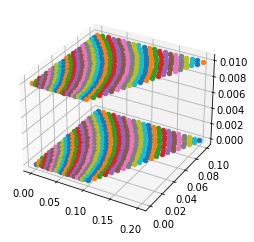

In [ ]:
from matplotlib import projections


def main():
    points = open('/Users/felipeandrade/openfoam/run/cavity/constant/polyMesh/points', 'r')
    lines = points.readlines()
    # print(lines[17:-1])
    points.close()
    
    data = lines[19:-1] #tirando o cabeçalho
    length = int(lines[17]) #número de pontos no documento
    print(length)
    data = data[:-3]
 
    for i in range(length):
        data[i] = data[i][1:-2]
        data[i] = data[i].split(' ')
        #IT NEEDS TO BE A LIST, BE CAREFUL TO NOT CHANGE POINTS
        for j in range(len(data[i])):
            data[i][j] = float(data[i][j])
            
    x_values = []
    y_values = []
    z_values = []
        
    for data_point in data:
        x_values.append(data_point[0])
        y_values.append(data_point[1])
        z_values.append(data_point[2])
        
    # print(data)
    print(f"x_values: {x_values}")
    print(f"y_values: {y_values}")
    print(f"z_values: {z_values}")
    return [x_values, y_values, z_values]

def plot(values):
    from matplotlib import pyplot as plt
    
    x, y, z = values[0], values[1], values[2]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    for i in range(len(values[0])):
        ax.scatter(x[i], y[i], z[i])
    
    plt.show()

if __name__ == '__main__':
    coordinates = main()
    plot(coordinates)